In [53]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline 

In [167]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [169]:
print ("Pandas Version " + pd.__version__)


Pandas Version 0.19.2


In [6]:
stock_data = data.get_data_yahoo("AAPL")['Adj Close']

In [35]:
def BS_Call(S,K,r,T,v,d=0):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    return S*np.exp(-d*T)*ss.norm.cdf(d1)-K*np.exp(-r*T)*ss.norm.cdf(d2)



In [36]:
def BS_Put(Flag,S,K,r,T,v,d=0):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    return K*np.exp(-r*T)*ss.norm.cdf(-d2)-S*np.exp(-d*T)*ss.norm.cdf(-d1)

In [165]:
def delta(S,T,v,K,r,d=0):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    return ss.norm.cdf(d1)


In [59]:
option = [BS_Call(S, K = 50, r = 0.05, T = 1, v = 0.5, d =0) for S in range (1,100)]
option_terminal = [BS_Call(S, K = 50, r = 0.05, T = 0.01, v = 0.5, d =0) for S in range (1,100)]

### Option Value

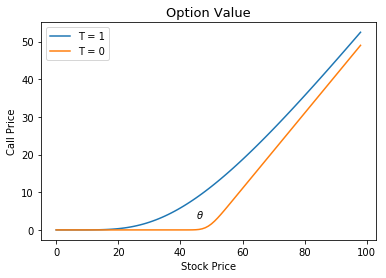

In [91]:
plt.plot(option)
plt.plot(option_terminal)
plt.ylabel("Call Price")
plt.xlabel("Stock Price")
plt.title("Option Value", fontsize = 13)
plt.legend(["T = 1", "T = 0"])
plt.text(45, 3, r'$\theta\ $')
plt.show()

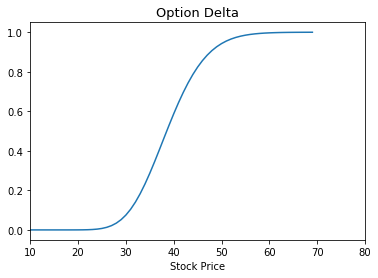

In [172]:
def plot_delta(T,v):
    delta_test = [delta(S,T,v,K = 50, r = 0.05,  d =0) for S in range (10,80)]
    plt.plot(delta_test)
    plt.xlim([10,80])
    plt.xlabel("Stock Price")
    plt.title("Option Delta", fontsize = 13)
    plt.show()

interact(plot_delta, T = (0.01,1,0.1),v = (0.01,0.5))

In [ ]:
interact(BS_Call, S=50, K = 50, r = 0.05, T = 1, v = 0.5, d =0 );

In [131]:
class Option_C:
    def __init__(self,S,K,r,T,v,d):

        self.S = S                        
        self.K = K               
        self.r = r                        
        self.T = T                        
        self.v = v  
        self.d = d
        self.d1 = (np.log(float(self.S)/self.K)+((self.r-self.d)+self.v*self.v/2.)*self.T)/(self.v*np.sqrt(self.T))
        self.d2  = self.d1-self.v*np.sqrt(self.T)
        
        #Pricing
        self.price = BS_Call(S,K,r,T,v,d)
        
        #Greeks
        self.delta = ss.norm.cdf(self.d1)

In [132]:
test = Option_C(50,50,0.05,1,0.4,0)

In [125]:
test.price

9.0114757251083404

In [134]:
test.delta

0.62740946415328402